In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.quantum_info import Statevector
import quantum_imaging as qi
import quantum_drawer as qd
from IPython.display import Image
import numpy as np
%matplotlib inline

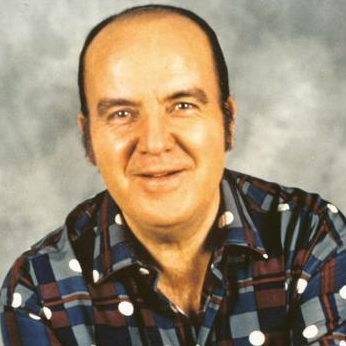

In [2]:
Image('quantum-fistro.png')

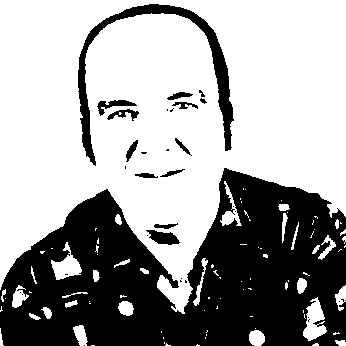

In [3]:
image_fistro = qi.convert_to_bw("quantum-fistro.png")
qi.image_from_array(image_fistro)

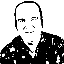

In [4]:
resized_image_fistro = qi.resize_array(image_fistro, size=(64, 64))
qi.image_from_array(resized_image_fistro)

In [5]:
array_binary_fistro = qi.binary_encode(resized_image_fistro)
qi.save_bin_array_to_csv('quantum_fistro_singular.csv', array_binary_fistro)

# Use one-hot encoding drawing file to create a Quantum circuit and rebuild the image with the circuit result

# Using the Aer simulator

In [6]:
# Simulator
qasm_sim = Aer.get_backend("aer_simulator")

# Number of circuit qubits
n_qubits = 7

In [7]:
binary_data_array = qi.load_bin_array_from_csv('quantum_fistro_singular.csv')

cols_items = binary_data_array.shape[1]
splitting = qd.splitting_chunks(cols_items, n_qubits)

rework_image = qd.rebuild_image_quantum_enhance_onerun(binary_data_array, splitting, n_qubits, qasm_sim)
rework_image.shape

(64, 64)

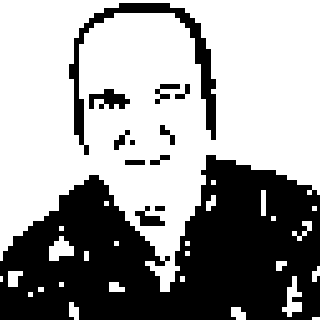

In [8]:
rebuild_data = qi.rebuild_binary_array(rework_image)
#qi.image_from_array(rebuild_data)
scaled_image = qi.scale_binary_image(rebuild_data, 5)
qi.image_from_array(scaled_image)

# Now, send the circuit to real Quantum Computer

In [9]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
import qiskit.tools.jupyter

In [10]:
if not IBMQ.active_account():
    IBMQ.load_account()

all_providers = IBMQ.providers()

provider = all_providers[1] #IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider

<AccountProvider for IBMQ(hub='ibm-q-csic', group='internal', project='main')>

In [11]:
%qiskit_backend_overview

In [12]:
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= n_qubits and b.status().operational and not b.configuration().simulator))

In [13]:
backend

<IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q-csic', group='internal', project='main')>

In [14]:
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [15]:
binary_data_array = qi.load_bin_array_from_csv('quantum_fistro_singular.csv')

cols_items = binary_data_array.shape[1]
splitting = qd.splitting_chunks(cols_items, n_qubits)

In [ ]:
rework_image = qd.rebuild_image_quantum_enhance_onerun(binary_data_array, splitting, n_qubits, backend, num_shots = 1)
rework_image.shape

In [17]:
%qiskit_disable_job_watcher

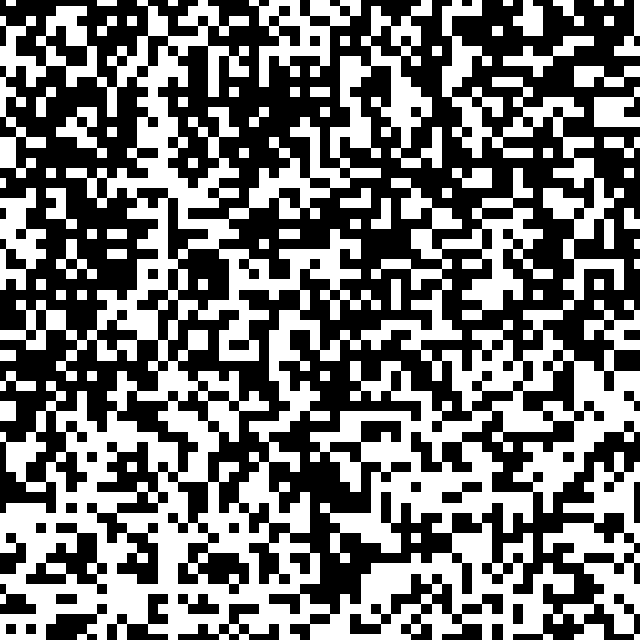

In [18]:
rebuild_data = qi.rebuild_binary_array(rework_image)
#qi.image_from_array(rebuild_data)
scaled_image = qi.scale_binary_image(rebuild_data, 10)
qi.image_from_array(scaled_image)

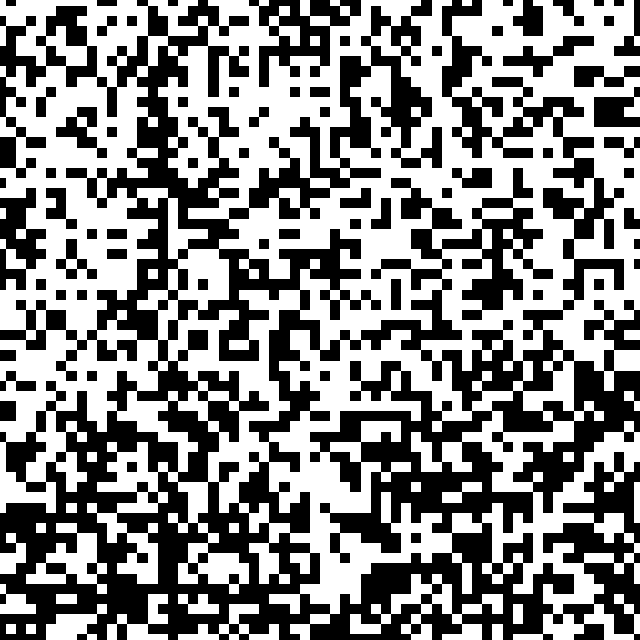

In [19]:
inverted = qi.invert_data(scaled_image)
qi.image_from_array(inverted)

In [20]:
array_binary_ibmq = qi.binary_encode(scaled_image)
qi.save_bin_array_to_csv('quantum_fistro_singular_ibmq.csv', array_binary_ibmq)

In [21]:
%qiskit_version_table